<a href="https://colab.research.google.com/github/MayteLlerena/Banco-Super-Caja/blob/main/Riesgo_Relativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()
project_id = 'proyecto-riesgorelativo-406715' # Especifica el ID del proyecto
client = bigquery.Client(project=project_id)

query = 'SELECT * FROM `proyecto-riesgorelativo-406715.Pruebas.TablaGeneral`' # Especifica la consulta SQL para obtener los datos

df = client.query(query).to_dataframe() # Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas

print(df.head()) # Imprime el DataFrame

   user_id  age sex  number_dependents_limpia  last_month_salary_limpia  \
0     8870   21   F                         0                    5200.0   
1    18876   21   F                         0                    5200.0   
2    28075   21   M                         0                    5200.0   
3    28122   21   M                         0                    5200.0   
4    33474   21   M                         0                    5200.0   

   real_estate  others  total_loans  debt_ratio_limpia  default_flag  ...  \
0            0       1            1                0.0             0  ...   
1            0       0            0                1.0             0  ...   
2            0       1            1                1.0             0  ...   
3            0       0            0                1.0             0  ...   
4            0       1            1                1.0             0  ...   

              riesgo_secured_lines  cuartil_total_loans  dummy_total_loans  \
0  mayor

**Matriz de correlaciones**

<ipython-input-4-bae45c7df756>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = UnionTablas.corr()


<bound method _AxesBase.tick_params of <Axes: >>

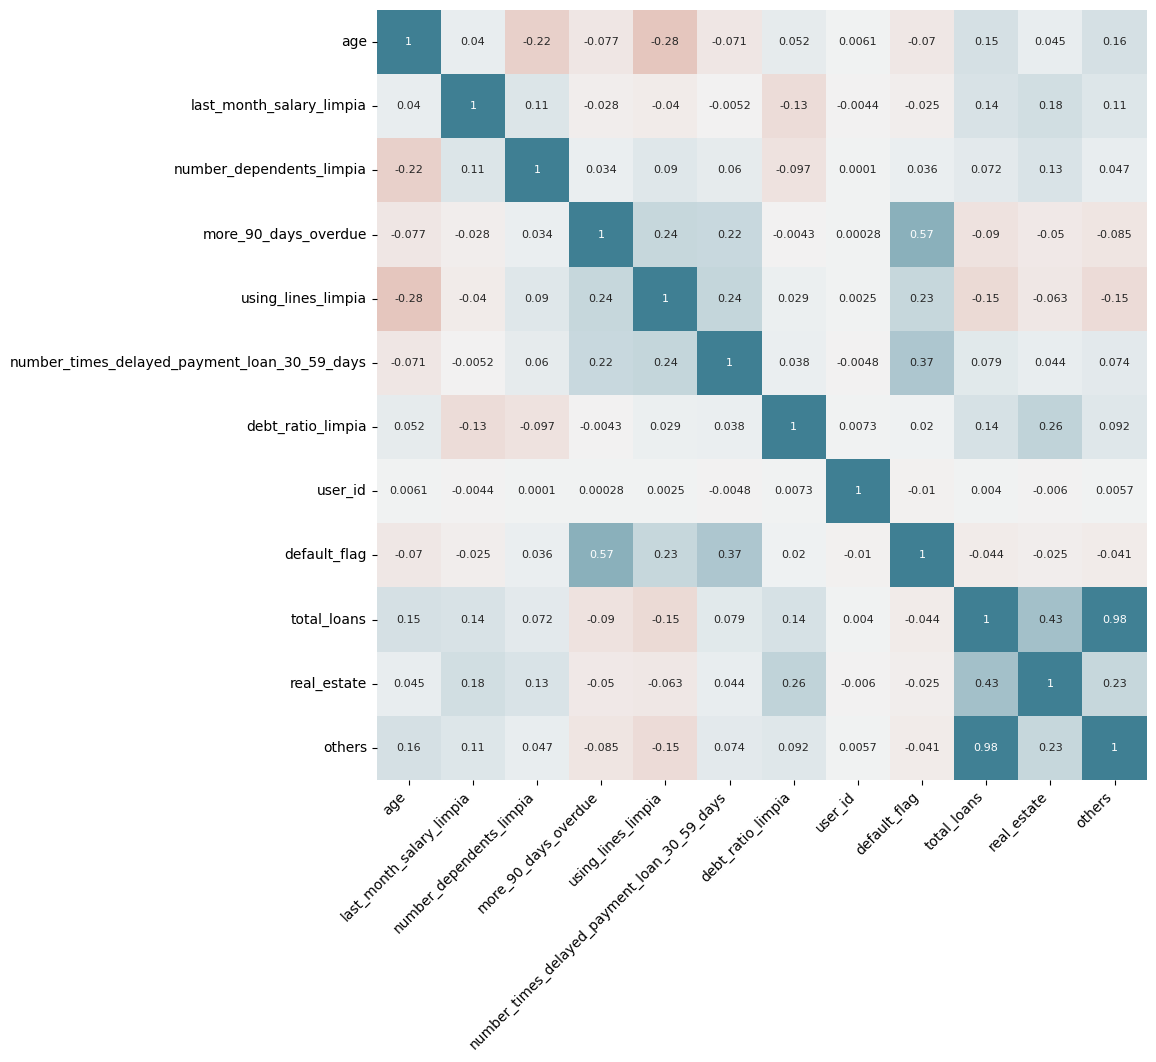

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Asegúrate de importar Seaborn
from google.colab import auth
from google.cloud import bigquery
# Autenticación con BigQuery
auth.authenticate_user()
project_id = "proyecto-riesgorelativo-406715"  # Reemplaza con tu ID de proyecto
# Configuración de la conexión a BigQuery
client = bigquery.Client(project=project_id)
# Consulta a BigQuery para obtener la tabla
query = """
SELECT *
FROM `proyecto-riesgorelativo-406715.Pruebas.UnionTablas`
"""
UnionTablas = client.query(query).to_dataframe()
# Calcula la matriz de correlación
corr_matrix = UnionTablas.corr()
# Visualización con Seaborn
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)
ax.tick_params

**Histograma**

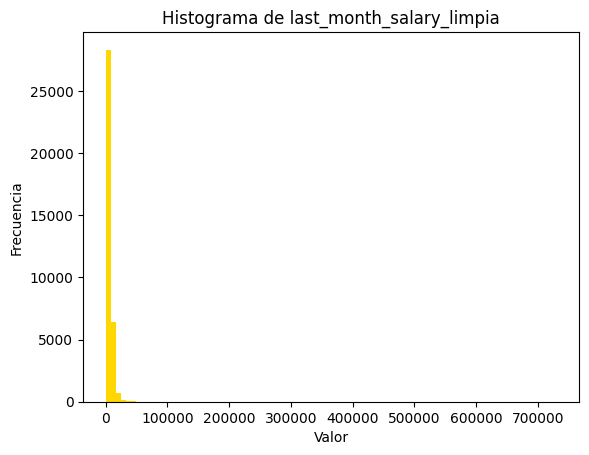

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd

# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'proyecto-riesgorelativo-406715'

# Conexión con BigQuery
client = bigquery.Client(project=project_id)

# Consulta SQL
query = '''
SELECT last_month_salary_limpia
FROM `proyecto-riesgorelativo-406715.Pruebas.TablaGeneral`
'''

# Ejecutar la consulta
query_job = client.query(query)

# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()

# Creación de histograma
plt.hist(result['last_month_salary_limpia'], bins=90, color='gold', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de last_month_salary_limpia')

# Visualización del histograma
plt.show()

In [ ]:
df.describe()

,user_id,age,number_dependents_limpia,last_month_salary_limpia,real_estate,others,total_loans,debt_ratio_limpia,default_flag,number_times_delayed_payment_loan_30_59_days,...,cuartil_delayed_payment,dummy_delayed_payment,cuartil_secured_lines,dummy_secured_lines,cuartil_total_loans,dummy_total_loans,cuartil_last_month_salary,dummy_last_month_salary,cuartil_number_dependent,dummy_number_dependent
count,35755.0,35755.0,35755.0,35755.000000,35755.0,35755.0,35755.0,35755.000000,35755.0,35755.0,...,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0
mean,18004.10681,52.248497,0.742246,6349.047518,1.021535,7.490701,8.512236,0.467931,0.017676,0.249112,...,2.499958,0.249979,2.499958,0.249979,2.499958,0.500014,2.499958,0.500014,2.499958,0.499986
std,10394.598969,14.540253,1.112517,8253.267882,1.119146,4.796816,5.175219,0.354664,0.131772,0.702049,...,1.118037,0.433007,1.118037,0.433007,1.118037,0.500007,1.118037,0.500007,1.118037,0.500007
min,1.0,21.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
25%,9004.5,41.0,0.0,3910.500000,0.0,4.0,5.0,0.178187,0.0,0.0,...,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0
50%,18005.0,52.0,0.0,5200.000000,1.0,7.0,8.0,0.366782,0.0,0.0,...,2.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0
75%,27009.5,63.0,1.0,7451.000000,2.0,10.0,11.0,0.870415,0.0,0.0,...,3.0,0.0,3.0,0.0,3.0,1.0,3.0,1.0,3.0,1.0
max,36000.0,89.0,13.0,730483.000000,25.0,56.0,57.0,1.000000,1.0,11.0,...,4.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0


Test de **Shapiro**

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth

# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()

# Especifica tu proyecto y configuración de BigQuery
project_id = "proyecto-riesgorelativo-406715"
query = "SELECT * FROM `proyecto-riesgorelativo-406715.Pruebas.TablaGeneral`"  # Reemplaza con tu propia consulta SQL

# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")

# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'total_loans'
datos = df[columna_interes].dropna()  # Asegúrate de manejar los valores nulos adecuadamente

# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)

# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')

# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')






Estadístico de Shapiro: 0.9247168302536011
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

   last_month_salary_limpia
0                    5200.0
1                    5200.0
2                    5200.0
3                    5200.0
4                    5200.0
Outliers:
       last_month_salary_limpia
1288                    14550.0
1554                    31250.0
2062                    14340.0
2124                    16000.0
2388                    27600.0
...                         ...
35725                   19515.0
35736                   35000.0
35737                   13000.0
35740                   14235.0
35751                   16666.0

[2150 rows x 1 columns]


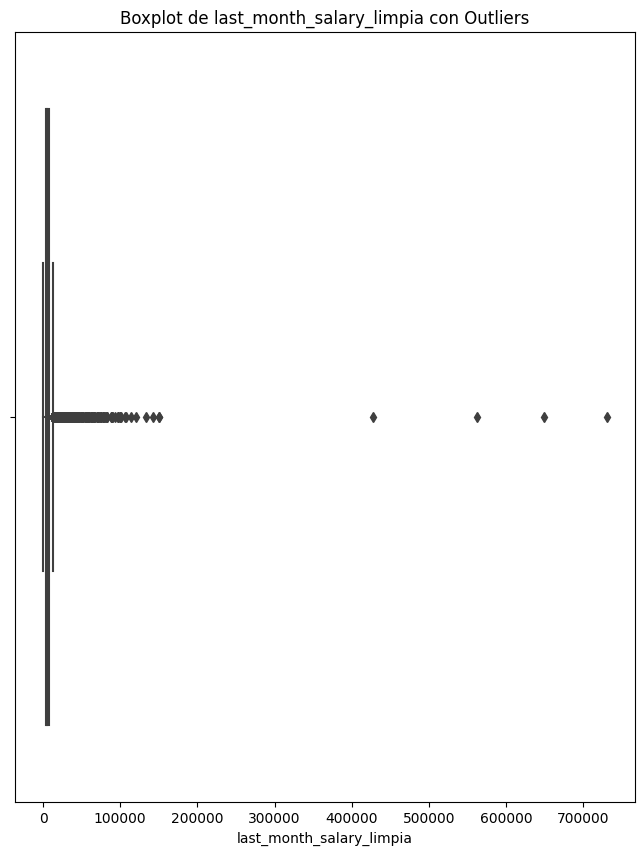

Mediana sin outliers: 5200.0


In [ ]:
# Configura la autenticación para BigQuery si no lo has hecho aún
from google.colab import auth
auth.authenticate_user()

# Configura tu proyecto de Google Cloud Platform y crea un cliente de BigQuery
project_id = 'proyecto-riesgorelativo-406715'
client = bigquery.Client(project=project_id)

# Consulta SQL para obtener los datos de la columna last_month_salary
query = '''
SELECT last_month_salary_limpia
FROM `proyecto-riesgorelativo-406715.Pruebas.TablaGeneral`
'''

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()

# Visualiza los primeros registros del DataFrame para asegurarte de que los datos se cargaron correctamente
print(df.head())

# Calcula los límites para identificar outliers usando el método de Tukey
Q1 = df['last_month_salary_limpia'].quantile(0.25)
Q3 = df['last_month_salary_limpia'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtra los outliers
outliers = df[(df['last_month_salary_limpia'] < lower_limit) | (df['last_month_salary_limpia'] > upper_limit)]

# Visualiza los outliers
print("Outliers:")
print(outliers)

# Crea un gráfico de caja (boxplot) vertical para visualizar los datos y outliers
plt.figure(figsize=(8, 10))
sns.boxplot(x='last_month_salary_limpia', data=df, orient='h')
plt.title('Boxplot de last_month_salary_limpia con Outliers')
plt.show()

# Filtra los outliers
datos_sin_outliers = df[(df['last_month_salary_limpia'] >= lower_limit) & (df['last_month_salary_limpia'] <= upper_limit)]

# Calcula la mediana de la variable sin outliers
mediana_sin_outliers = datos_sin_outliers['last_month_salary_limpia'].median()

# Imprime la mediana sin outliers
print(f"Mediana sin outliers: {mediana_sin_outliers}")



Accuracy: 0.8042
Precision: 0.0746
Recall: 0.8829
F1 Score: 0.1375

Matriz de Confusión:
          Predicted 0  Predicted 1
Actual 0        28197         6926
Actual 1           74          558


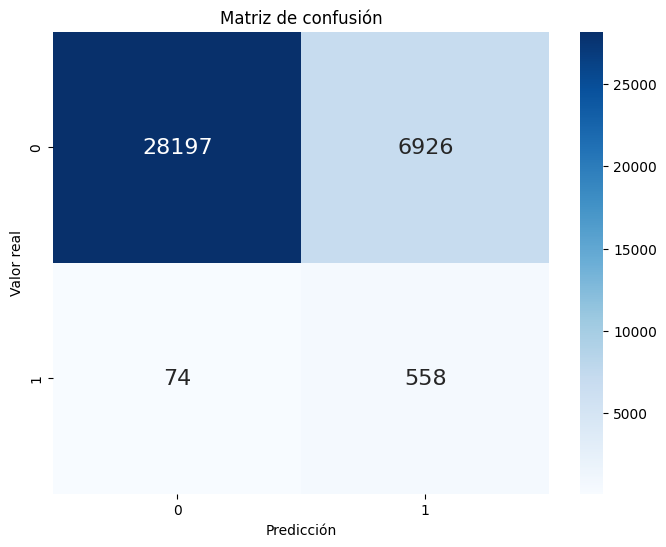

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos desde Google Colab
project_id = "proyecto-riesgorelativo-406715"
query = "SELECT * FROM Pruebas.ScoreCrediticio"
df = pd.read_gbq(query, project_id=project_id)

# Supongamos que 'default_flag' es tu etiqueta real y 'dummy_score' es tu etiqueta predicha
y_real = df['default_flag']
y_pred = df['dummy_score']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred)

# Calcular métricas
accuracy = accuracy_score(y_real, y_pred)
precision = precision_score(y_real, y_pred)
recall = recall_score(y_real, y_pred)
f1 = f1_score(y_real, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Mostrar la matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("\nMatriz de Confusión:")
print(conf_matrix_df)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()


**Regresión logística con datos balanceados para la variable default flag**


In [ ]:
pip install scikit-learn

Accuracy: 0.9669976227101105
Confusion Matrix:
[[6778  234]
 [   2  137]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      7012
         1.0       0.37      0.99      0.54       139

    accuracy                           0.97      7151
   macro avg       0.68      0.98      0.76      7151
weighted avg       0.99      0.97      0.97      7151

Precision: 0.3692722371967655
Sensitivity (Recall): 0.9856115107913669
Specificity: 0.9666286366229321
F1 Score: 0.5372549019607843
          Predicted 0  Predicted 1
Actual 0         6778          234
Actual 1            2          137


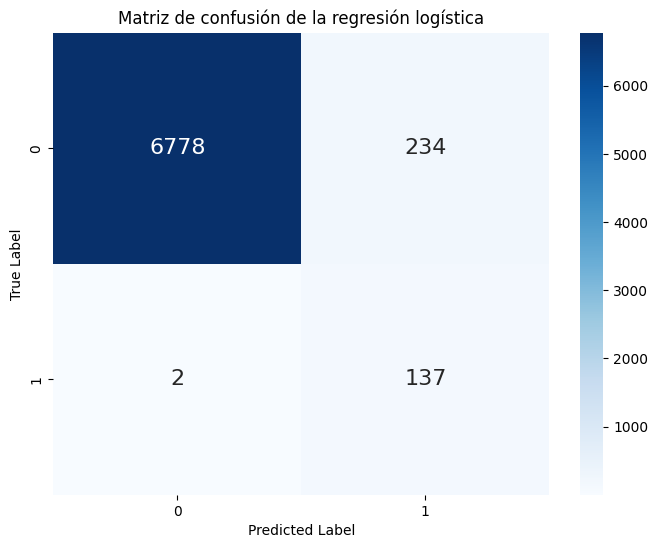

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.cloud import bigquery

# Especifica tu proyecto y la tabla de BigQuery
project_id = 'proyecto-riesgorelativo-406715'
table_id = 'Pruebas.TablaGeneral'

# Consulta BigQuery y carga los datos en un DataFrame de Pandas
client = bigquery.Client(project=project_id)
query = f'SELECT age, number_dependents_limpia, last_month_salary_limpia, default_flag, real_estate, others, total_loans, debt_ratio_limpia, number_times_delayed_payment_loan_30_59_days, more_90_days_overdue, using_lines_limpia FROM `{project_id}.{table_id}`'
df = client.query(query).to_dataframe()

# Separar las características (X) y la variable dependiente (y)
X = df[['age','number_dependents_limpia','last_month_salary_limpia','real_estate', 'others', 'total_loans', 'debt_ratio_limpia', 'number_times_delayed_payment_loan_30_59_days', 'more_90_days_overdue', 'using_lines_limpia']]
y = df['default_flag']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de regresión logística con peso de clase
model = LogisticRegression(class_weight='balanced')

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Obtener métricas adicionales de la regresión logística
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')
print(f'Precision: {precision}')
print(f'Sensitivity (Recall): {sensitivity}')
print(f'Specificity: {specificity}')
print(f'F1 Score: {f1_score}')

# Mostrar la matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusión de la regresión logística')
plt.show()




<ipython-input-64-cca3c3eaf00b>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis')


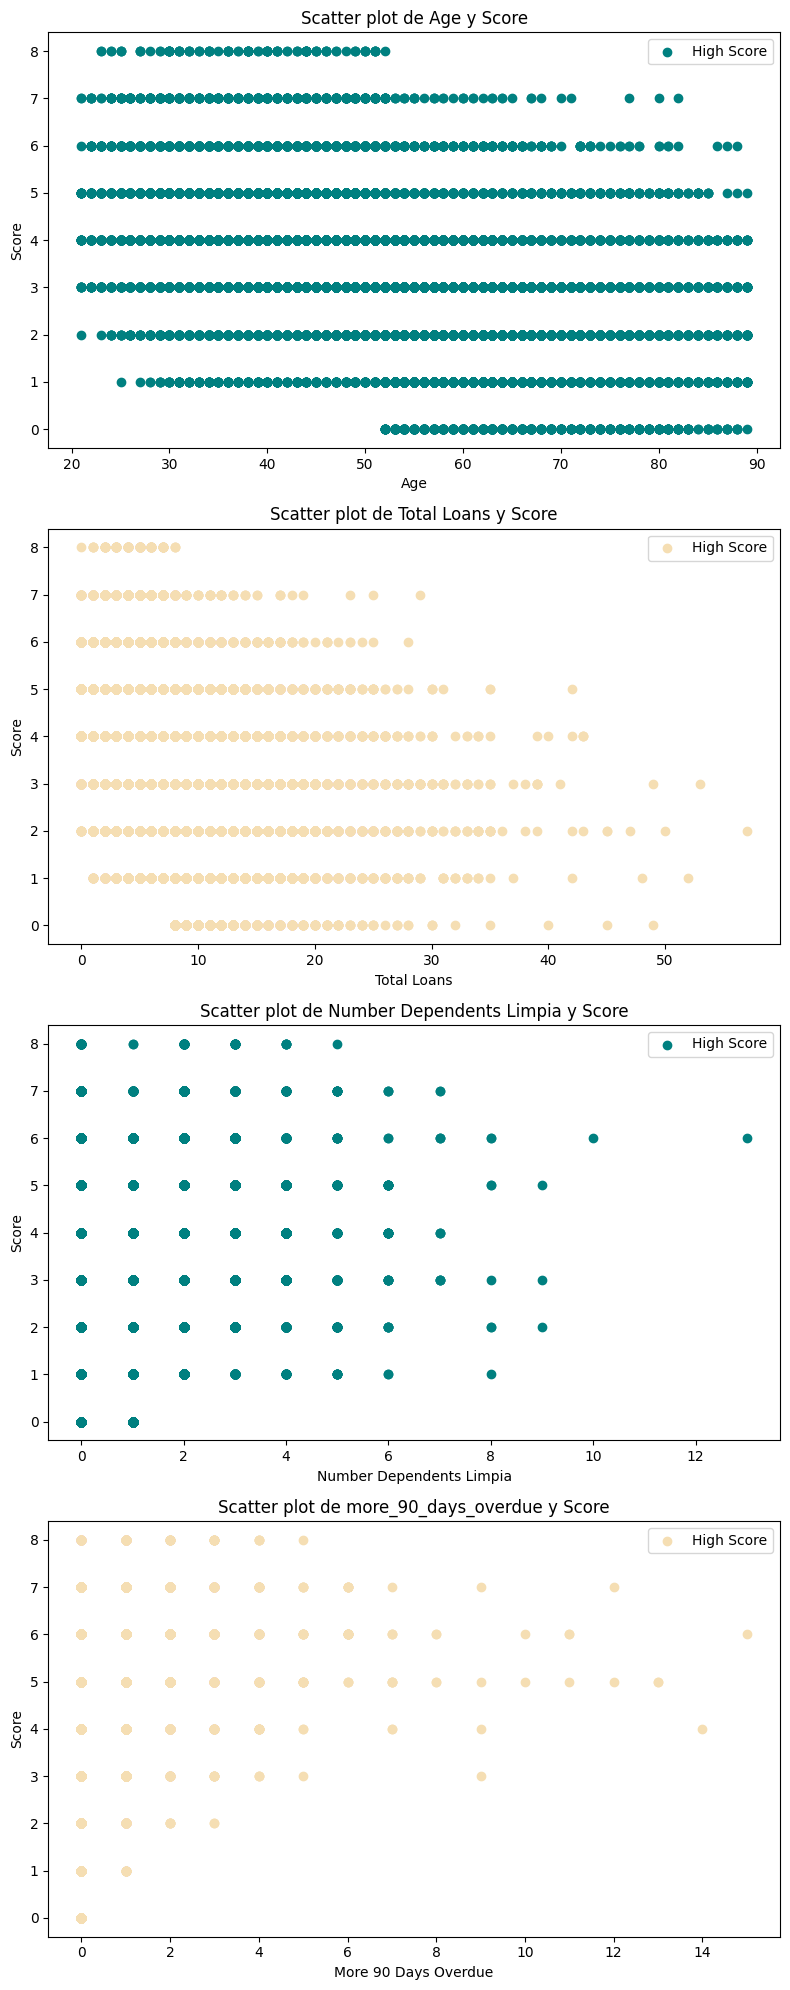

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Autenticación con Google Cloud
auth.authenticate_user()

# Configurar el cliente de BigQuery
project_id = 'proyecto-riesgorelativo-406715'
client = bigquery.Client(project=project_id)

# Consulta SQL para obtener los datos necesarios
query = '''
SELECT
  age,
  total_loans,
  number_dependents_limpia,
  more_90_days_overdue,
  score
FROM
  `proyecto-riesgorelativo-406715.Pruebas.TablaScore`
'''

# Ejecutar la consulta y obtener los resultados
df = client.query(query).to_dataframe()

# Crear un mapa de colores para los puntos basado en la variable 'score'
color_map = plt.cm.get_cmap('viridis')

# Normalizar la variable 'score' para asignar colores
normalized_score = (df['score'] - df['score'].min()) / (df['score'].max() - df['score'].min())

# Definir condición para resaltar en verde
condition_green = normalized_score > 0.8  # Puedes ajustar el umbral según tu preferencia

# Graficar el gráfico bivariado con colores
plt.figure(figsize=(8, 20))

# Scatter plot de age y score con color verde
plt.subplot(4, 1, 1)  # Cambié el número total de subplots a 4
plt.scatter(df['age'], df['score'], color='teal', label='High Score')
plt.title('Scatter plot de Age y Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend()

# Scatter plot de total_loans y score con color verde
plt.subplot(4, 1, 2)  # Cambié el número total de subplots a 4
plt.scatter(df['total_loans'], df['score'], color='wheat', label='High Score')
plt.title('Scatter plot de Total Loans y Score')
plt.xlabel('Total Loans')
plt.ylabel('Score')
plt.legend()

# Scatter plot de number_dependents_limpia y score con color verde
plt.subplot(4, 1, 3)  # Cambié el número total de subplots a 4
plt.scatter(df['number_dependents_limpia'], df['score'], color='teal', label='High Score')
plt.title('Scatter plot de Number Dependents Limpia y Score')
plt.xlabel('Number Dependents Limpia')
plt.ylabel('Score')
plt.legend()

# Scatter plot de more_90_days_overdue y score con color verde
plt.subplot(4, 1, 4)  # Este es el nuevo subplot
plt.scatter(df['more_90_days_overdue'], df['score'], color='wheat', label='High Score')
plt.title('Scatter plot de more_90_days_overdue y Score')
plt.xlabel('More 90 Days Overdue')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()
